In [ ]:

'''
This notebook analyzes the extent, distribution, and relationships of missing values  
for the **restricted set of 30 approved features** used in the Habitable Planet Hunter project.

No imputation or filling is performed in this notebook.

'''

'\nThis notebook analyzes the extent, distribution, and relationships of missing values  \nfor the **restricted set of 30 approved features** used in the Habitable Planet Hunter project.\n\n⚠️ No imputation or filling is performed in this notebook.\n\n'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [6]:
import kagglehub

dataset_path = kagglehub.dataset_download("chandrimad31/phl-exoplanet-catalog")
print(dataset_path)


100%|██████████| 931k/931k [00:01<00:00, 598kB/s]

Extracting files...
C:\Users\Manish\.cache\kagglehub\datasets\chandrimad31\phl-exoplanet-catalog\versions\1


In [10]:
import os
import pandas as pd

csv_path = os.path.join(dataset_path, "phl_exoplanet_catalog_2019.csv")
df = pd.read_csv(csv_path)

df.shape



(4048, 112)

In [11]:
## Restricted Feature Set (30 Columns)

 #Analysis is strictly limited to the 30 approved features as defined in the project README.

In [12]:
features_30 = [
    "P_MASS","P_RADIUS","P_DENSITY","P_GRAVITY","P_ESCAPE","P_TYPE",
    "P_PERIOD","P_SEMI_MAJOR_AXIS","P_ECCENTRICITY","P_INCLINATION",
    "P_OMEGA","P_PERIASTRON","P_APASTRON","P_IMPACT_PARAMETER","P_HILL_SPHERE",
    "S_MASS","S_RADIUS","S_LUMINOSITY","S_TEMPERATURE","S_AGE",
    "S_METALLICITY","S_LOG_G","S_TYPE","S_MAG","S_DISC","S_MAGNETIC_FIELD",
    "S_SNOW_LINE","S_TIDAL_LOCK","P_DETECTION","P_DISTANCE"
]

df_30 = df[features_30]
df_30.head()


,P_MASS,P_RADIUS,P_DENSITY,P_GRAVITY,P_ESCAPE,P_TYPE,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,...,S_METALLICITY,S_LOG_G,S_TYPE,S_MAG,S_DISC,S_MAGNETIC_FIELD,S_SNOW_LINE,S_TIDAL_LOCK,P_DETECTION,P_DISTANCE
0,6165.86330,NaN,NaN,NaN,NaN,Jovian,326.03000,1.29,0.231,NaN,...,-0.35,2.31,K0 III,4.740,NaN,NaN,34.529063,0.642400,Radial Velocity,1.324418
1,4684.78480,NaN,NaN,NaN,NaN,Jovian,516.21997,1.53,0.080,NaN,...,-0.02,1.93,K4 III,5.016,NaN,NaN,42.732816,0.648683,Radial Velocity,1.534896
2,1525.57440,NaN,NaN,NaN,NaN,Jovian,185.84000,0.83,0.000,NaN,...,-0.24,2.63,G8 III,5.227,NaN,NaN,20.593611,0.600010,Radial Velocity,0.830000
3,1481.07850,NaN,NaN,NaN,NaN,Jovian,1773.40000,2.93,0.370,NaN,...,0.41,4.45,K0 V,6.610,NaN,NaN,2.141648,0.445415,Radial Velocity,3.130558
4,565.73385,NaN,NaN,NaN,NaN,Jovian,798.50000,1.66,0.680,NaN,...,0.06,4.36,G2.5 V,6.250,NaN,NaN,3.019411,0.473325,Radial Velocity,2.043792


In [13]:
missing_summary = pd.DataFrame({
    "Missing_Count": df_30.isna().sum(),
    "Missing_Percentage (%)": (df_30.isna().mean() * 100).round(2),
    "Data_Type": df_30.dtypes
}).sort_values("Missing_Percentage (%)", ascending=False)

missing_summary


,Missing_Count,Missing_Percentage (%),Data_Type
S_MAGNETIC_FIELD,4048,100.00,float64
S_DISC,4048,100.00,float64
P_ESCAPE,3342,82.56,float64
P_DENSITY,3342,82.56,float64
P_GRAVITY,3342,82.56,float64
P_OMEGA,3302,81.57,float64
P_INCLINATION,3204,79.15,float64
S_TYPE,2678,66.16,object
P_ECCENTRICITY,2668,65.91,float64
P_IMPACT_PARAMETER,2639,65.19,float64


In [14]:
'''
Summary of Findings

Missingness is highly uneven across the 30 features.

Two stellar features (S_MAGNETIC_FIELD, S_DISC) are entirely missing (100%), indicating unavailable measurements in the catalog.

Several derived planetary properties (P_DENSITY, P_GRAVITY, P_ESCAPE) exhibit severe missingness (>80%), reflecting dependency on unavailable mass–radius measurements.

Orbital geometry parameters (P_OMEGA, P_INCLINATION, P_IMPACT_PARAMETER) are frequently missing together, suggesting detection-method bias.

Core observational features (P_PERIOD, P_DETECTION, P_TYPE) have minimal or no missing values and are consistently available.


'''

'\nSummary of Findings\n\nMissingness is highly uneven across the 30 features.\n\nTwo stellar features (S_MAGNETIC_FIELD, S_DISC) are entirely missing (100%), indicating unavailable measurements in the catalog.\n\nSeveral derived planetary properties (P_DENSITY, P_GRAVITY, P_ESCAPE) exhibit severe missingness (>80%), reflecting dependency on unavailable mass–radius measurements.\n\nOrbital geometry parameters (P_OMEGA, P_INCLINATION, P_IMPACT_PARAMETER) are frequently missing together, suggesting detection-method bias.\n\nCore observational features (P_PERIOD, P_DETECTION, P_TYPE) have minimal or no missing values and are consistently available.\n\n\n'

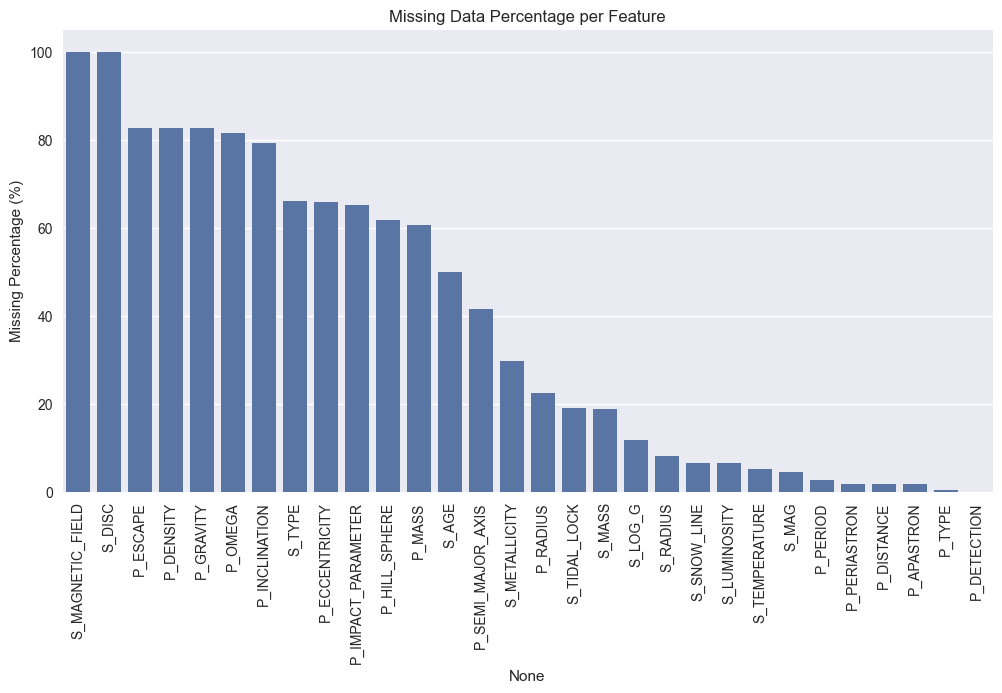

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=missing_summary.index,
    y=missing_summary["Missing_Percentage (%)"]
)
plt.xticks(rotation=90)
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Data Percentage per Feature")
plt.show()


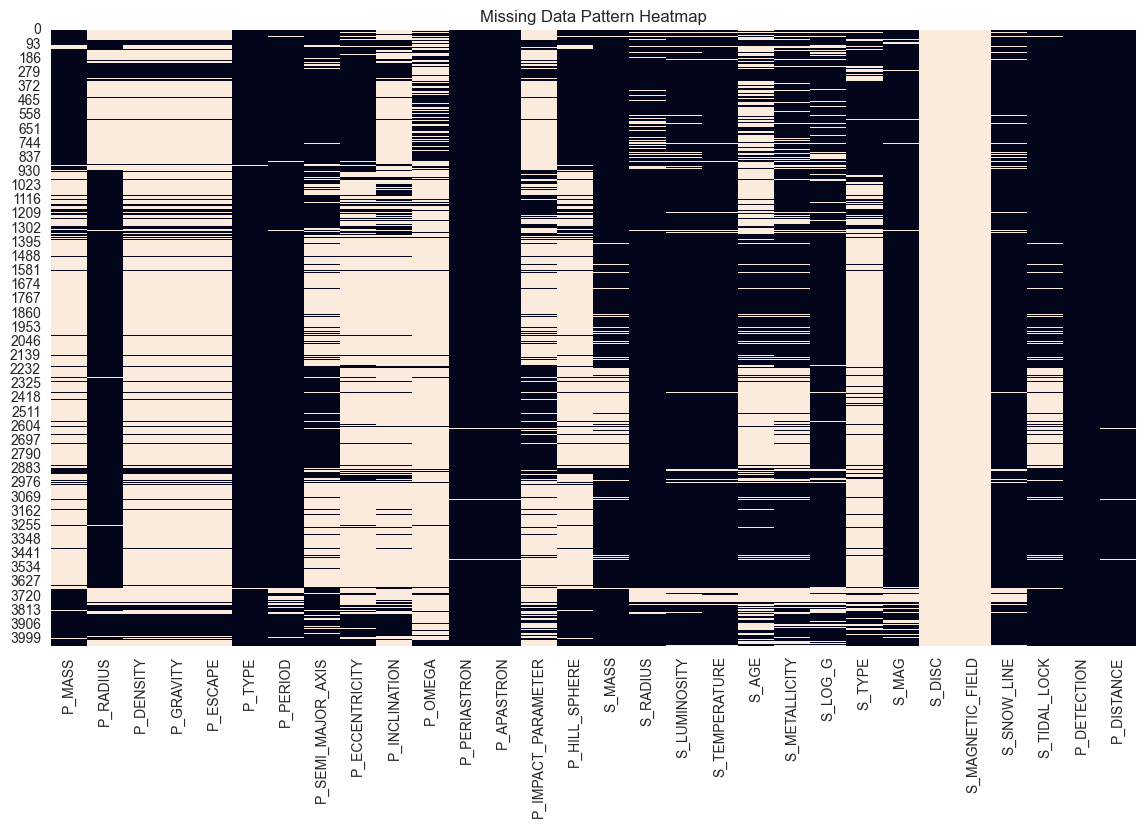

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(df_30.isna(), cbar=False)
plt.title("Missing Data Pattern Heatmap")
plt.show()


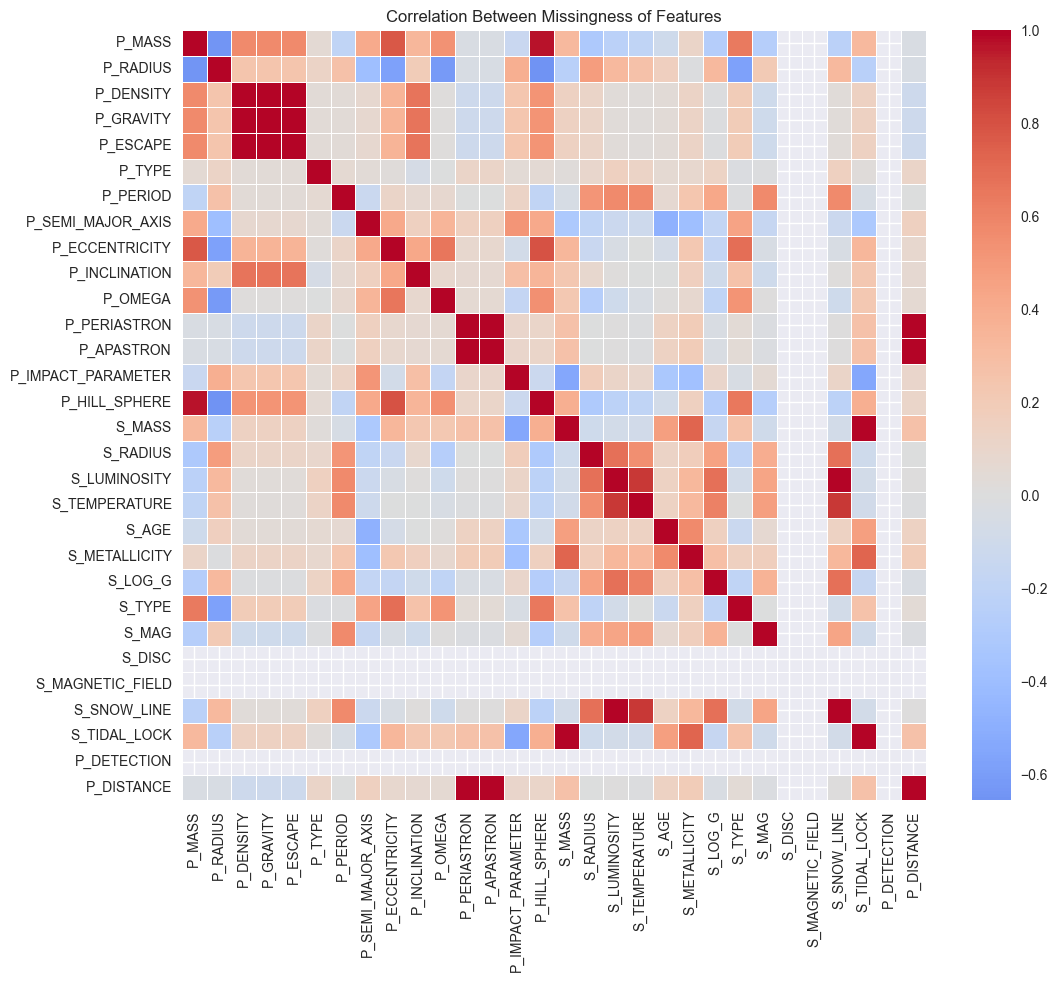

In [17]:
missing_corr = df_30.isna().corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    missing_corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Between Missingness of Features")
plt.show()


In [ ]:
'''
Missingness Relationships

Correlation analysis of missing-value indicators reveals:

Strong co-missing relationships among derived planetary properties.

Orbital parameters tend to be missing jointly in non-transit detections.

Stellar properties show comparatively weaker missingness correlation, indicating independent measurement processes.

These patterns confirm that missing values are not missing at random (MNAR) and are influenced by observational constraints.


'''